# Import required libraries

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load The Data

In [2]:
housing = pd.read_excel("housing.xlsx")

# Print first few rows of this data

In [3]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# Fill the missing values with the mean of the respective column

In [4]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
housing.total_bedrooms = housing.total_bedrooms.fillna(housing.total_bedrooms.mean())
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# Convert categorical column in the dataset to numerical data

In [6]:
le = LabelEncoder()

In [7]:
housing['ocean_proximity']=le.fit_transform(housing['ocean_proximity'])

# Standardize training and test datasets

In [8]:
names = housing.columns
scaler = StandardScaler()

In [9]:
scaled_df = scaler.fit_transform(housing)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,1.291089,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.291089,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.291089,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.291089,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.291089,1.172900


# Extract input (X) and output (Y) data from the dataset

In [10]:
X_features = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households',
               'median_income','ocean_proximity','median_house_value']
X = scaled_df[X_features]
Y = scaled_df['median_house_value']

In [11]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [12]:
print(type(Y))

<class 'pandas.core.series.Series'>


In [13]:
print(X.shape)

(20640, 10)


In [14]:
print(Y.shape)

(20640,)


# Split the data into 80% training dataset and 20% test dataset

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [16]:
print (x_train.shape, y_train.shape)

(16512, 10) (16512,)


In [17]:
print (x_test.shape, y_test.shape)

(4128, 10) (4128,)


# Perform Linear Regression

In [18]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [19]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [20]:
y_predict = linreg.predict(x_test)

In [21]:
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

2.451652034014511e-15
1.0


# Perform Decision Tree Regression

In [31]:
dtreg=DecisionTreeRegressor()
dtreg.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse')

In [37]:
y_predict = dtreg.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.0008269657636350467
0.9999993057735597


# Perform Random Forest Regression

In [40]:
rfreg=RandomForestRegressor()
rfreg.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', n_estimators=10)

In [45]:
y_predict = rfreg.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.0005130424176834727
0.9999997328023483


# Extract just the median_income column from the independent variables

In [22]:
x_train_Income=x_train[['median_income']]
x_test_Income=x_test[['median_income']]

In [23]:
print(x_train_Income.shape)
print(y_train.shape)

(16512, 1)
(16512,)


# Perform Linear Regression to predict housing values based on median_income

In [24]:
linreg=LinearRegression()
linreg.fit(x_train_Income,y_train)
y_predict = linreg.predict(x_test_Income)

# Predict output for test dataset using the fitted model

In [25]:
print(linreg.intercept_, linreg.coef_)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.005623019866893164 [0.69238221]
0.7212595914243148
0.47190835934467734


# Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data

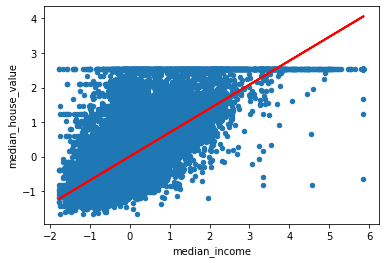

In [28]:
scaled_df.plot(kind='scatter',x='median_income',y='median_house_value')
plt.plot(x_test_Income,y_predict,c='red',linewidth=2)